## Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# processing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.filterwarnings('ignore')

# **Binary Classification**

In [2]:
# import Mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# check target values
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
# check shape for X, y
print("X shape is: ", X.shape)
print('='*25)
print("y shape is: ", y.shape)

X shape is:  (70000, 784)
y shape is:  (70000,)


In [6]:
# get the 1st photo from mnist
first_photo = X.loc[0].values.reshape(28,28)

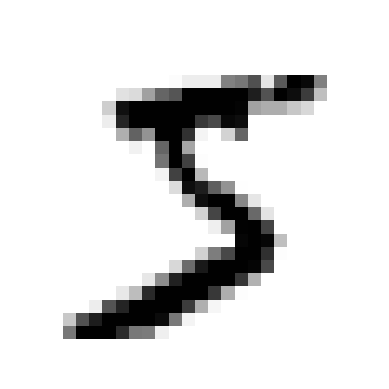

In [7]:
plt.imshow(first_photo, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
# check tatrget for 1st photo
y[0]

'5'

In [9]:
# cast y[0] to integer value
y = y.astype(np.uint8)
y[0]

5

In [10]:
# divide data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = y_train == 5

In [12]:
y_test_5 = y_test == 5

In [13]:
# training a binary classification using SGDClassifier
sgd_clf = SGDClassifier(random_state=20)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict(X[:9])

array([ True, False, False, False, False, False, False, False, False])

In [14]:
y_train_5[:9]

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: class, dtype: bool

### performance measures

In [15]:
# performance measure using cross validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96505, 0.9675 , 0.91375])

In [16]:
# make prediction of ignored data
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [18]:
# make predictions using cross validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
# performance measure using confusion matrix
confusion_matrix(y_train_pred, y_train_5)

array([[52695,  1190],
       [ 1884,  4231]], dtype=int64)

In [20]:
# performance measure using precision and recall
print("precision_score is: ", precision_score(y_train_5, y_train_pred))
print("="*40)
print("recall_score is: ", recall_score(y_train_5, y_train_pred))

precision_score is:  0.6919051512673753
recall_score is:  0.7804833056631618


In [21]:
# performance measure using f1_score
print("f1_score is: ", f1_score(y_train_5, y_train_pred))

f1_score is:  0.7335298196948682


#### **Precision/Recall Tradeoff**


In [22]:
# get scores using decision_function()
y_scores = sgd_clf.decision_function(X.loc[0:9])
y_scores

array([   985.58186458, -10858.74707462, -14766.39378776,  -7208.37342647,
        -5681.31122781,  -7335.48404647,  -3574.79114438,  -9669.4171267 ,
        -1207.11289618,  -4554.42555684])

In [23]:
y_train_5.loc[:9]

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: class, dtype: bool

In [24]:
# get scores on training data using cross validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores.shape

(60000,)

In [25]:
# compute precision and recall for all possible thresholds using precision_recall_curve() function
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
recalls.shape

(59823,)

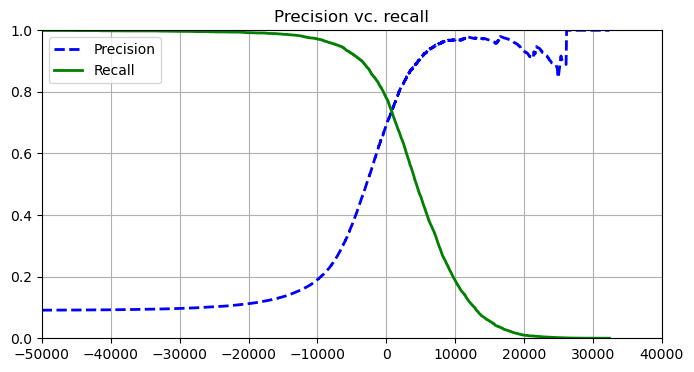

In [27]:
# visualize precision and recll
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.title('Precision vc. recall')
plt.axis([-50000, 40000, 0, 1])
plt.grid()
plt.legend()
plt.show()

In [28]:
# get recall and threshold for precision = 90% 
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print("recall_90_precision is: ", recall_90_precision)
print('='*45)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("threshold_90_precisionis: ",threshold_90_precision)

recall_90_precision is:  0.48146098505810736
threshold_90_precisionis:  4638.827306174002


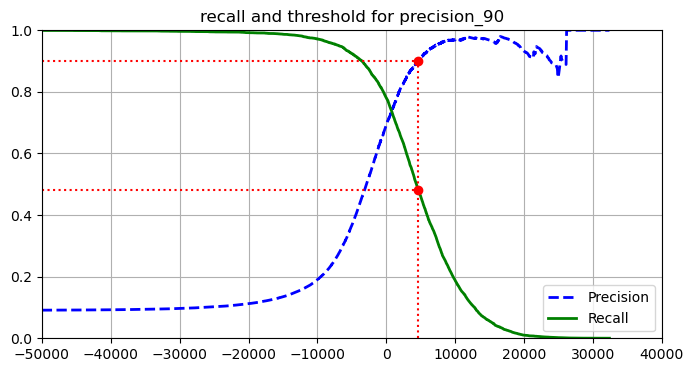

In [29]:
# visualize recall and threshold for precision_90
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.title('recall and threshold for precision_90')
plt.axis([-50000, 40000, 0, 1])

# line for threshold
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")               

# line for precision 90
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")

# line for recall 90 
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [recall_90_precision], "ro") 

plt.grid()
plt.legend()
plt.show()

In [30]:
#threshold_for_90_precision = thresholds[idx_for_90_precision]
#threshold_for_90_precision

In [31]:
# make predictions for precision and recall again
y_train_pred_90 = (y_scores >= threshold_90_precision)
print("precision_score is: ", precision_score(y_train_5, y_train_pred_90))
print('='*40)
print("recall_score is: ", recall_score(y_train_5, y_train_pred_90))

precision_score is:  0.9
recall_score is:  0.48146098505810736


#### **Roc Curve**

In [32]:
# get fpr, tpr, thresholds  
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

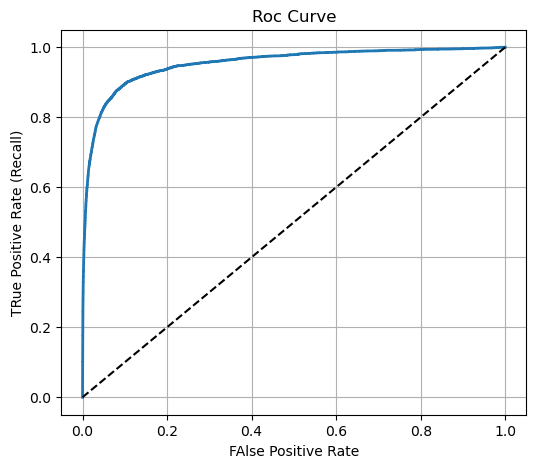

In [33]:
# visualize Roc Curve
plt.subplots(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Roc Curve')
plt.xlabel('FAlse Positive Rate')
plt.ylabel('TRue Positive Rate (Recall)')
plt.grid()
plt.show()

In [34]:
# calcualate AUC 
print('AUC_Score is: ', roc_auc_score(y_train_5, y_scores))

AUC_Score is:  0.9538037160088807


#### RandomForestClassifier

In [35]:
forest_clf = RandomForestClassifier(random_state=0)
# make prediction using cross validation and predict_proba
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [36]:
# get scores (proba of positive class) for RandomForestClassifier
y_scores_forest = y_proba_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [37]:
y_scores_forest

array([0.82, 0.01, 0.04, ..., 0.98, 0.06, 0.1 ])

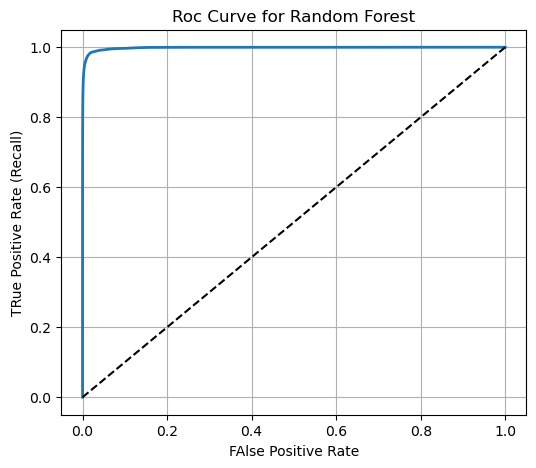

In [38]:
# visualize Roc Curve for Random Forest
plt.subplots(figsize=(6,5))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Roc Curve for Random Forest')
plt.xlabel('FAlse Positive Rate')
plt.ylabel('TRue Positive Rate (Recall)')
plt.grid()
plt.show()

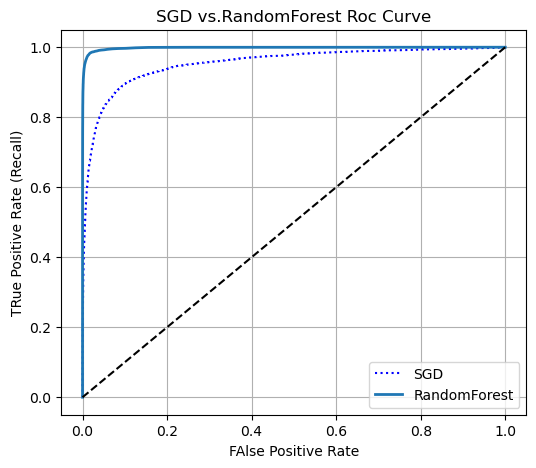

In [39]:
# visualize Roc Curve for SGD vs.Random Forest
plt.subplots(figsize=(6,5))
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="RandomForest")
plt.plot([0, 1], [0, 1], 'k--') 

plt.title('SGD vs.RandomForest Roc Curve')
plt.xlabel('FAlse Positive Rate')
plt.ylabel('TRue Positive Rate (Recall)')

plt.grid()
plt.legend()
plt.show()

In [40]:
# get AUC for RandomForest
print('AUC_RandomForest is: ', roc_auc_score(y_train_5, y_scores_forest))

AUC_RandomForest is:  0.9983139390673001


# **Multiclass Classification**

In [41]:
# scale X_train using StandaredScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [42]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

### SGD Classifier 

In [43]:
sgd_clf.fit(X_train, y_train)
digit = X[:1].values
sgd_clf.predict(digit)

array([5], dtype=uint8)

In [44]:
# get scores using decision function
digit_scores = sgd_clf.decision_function(digit)
digit_scores

array([[-13635.58988627, -26268.59301979,  -7812.65928812,
          -675.61421886, -27437.3302543 ,   1454.05657509,
        -26330.98937691, -12185.87181873,  -8842.69023341,
         -9876.7421915 ]])

In [45]:
# get the heighst index value
np.argmax(digit_scores)

5

In [46]:
# get classes of sgd_clf 
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
# get accuracy on training
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86825, 0.866  , 0.88185])

In [48]:
# get accuracy on testing 
sgd_accuracy = sgd_clf.score(X_test, y_test)
sgd_accuracy

0.8579

### RandomForest Classifier

In [50]:
forest_clf.fit(X_train, y_train)
forest_clf.predict(digit)

array([5], dtype=uint8)

In [51]:
# get proba for RandomForestClassifier
forest_clf.predict_proba = forest_clf.predict_proba(digit)

In [52]:
# get the heighst index value
np.argmax(forest_clf.predict_proba)

5

In [53]:
# get accuracy 
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96465, 0.96225, 0.9659 ])

### SVM Classifier

In [54]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(digit)

array([5], dtype=uint8)

In [55]:
# get scores using decision function
digit_scores_svm = svm_clf.decision_function(digit)
digit_scores_svm

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [56]:
# get the heighst index value
np.argmax(digit_scores_svm)

5

In [57]:
# get classes of sgd_clf 
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [58]:
# get accuracy
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

In [59]:
# get accuracy on test
svm_accuracy = svm_clf.score(X_test, y_test)
svm_accuracy

0.9792

### KNeighborsClassifier

In [60]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.predict(digit)

array([5], dtype=uint8)

In [61]:
# get accuracy on test
knn_accuracy = knn_clf.score(X_test, y_test)
knn_accuracy

0.9688

# Error Analysis

In [62]:
# make prediction using cross validation on SVM Classifier
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

# confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]],
      dtype=int64)

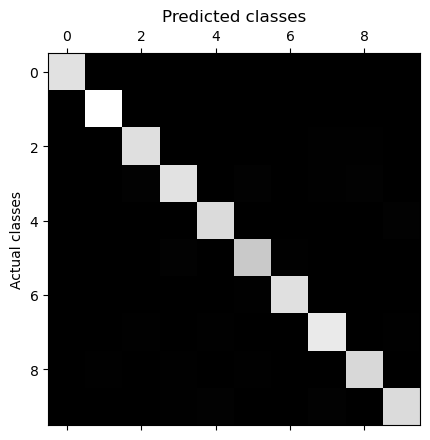

In [63]:
# visualize confusion_matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.ylabel("Actual classes")
plt.title("Predicted classes")
plt.show()

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # (10, 1)
print(row_sums)

# normalize confusion matrix
normalized_conf_mx = conf_mx / row_sums

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


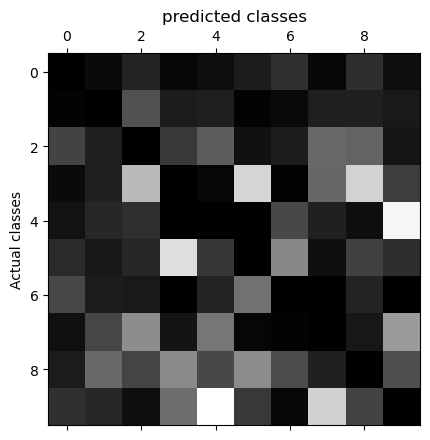

In [65]:
# visualize normalized_conf_mx
np.fill_diagonal(normalized_conf_mx, 0)
plt.matshow(normalized_conf_mx, cmap=plt.cm.gray)
plt.ylabel("Actual classes")
plt.title("predicted classes")

plt.show()

# Multilabel Classification

In [66]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel[:10, :]

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False, False]])

In [67]:
y_train[:10].values

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### KNeighborsClassifier

In [68]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict(digit) 

array([[False,  True]])

In [69]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict(digit) 

array([[False,  True]])

In [70]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# Multioutput Classification

In [71]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

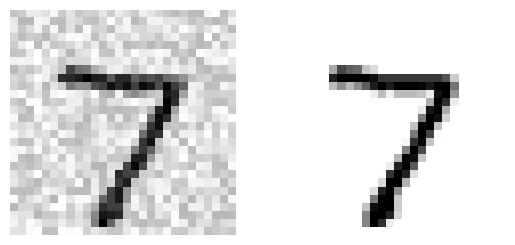

In [72]:
test_photo = X_test[:1].values.reshape(28,28)
test_photo_mod = X_test_mod[:1].values.reshape(28,28)

plt.subplot(121)
plt.imshow(test_photo_mod, cmap=plt.cm.binary)
plt.axis('off')

plt.subplot(122)
plt.imshow(test_photo, cmap=plt.cm.binary)
plt.axis('off')

plt.show()

In [73]:
knn_clf.fit(X_train_mod, y_train)
# test_photo = X_test[:1].values.reshape(28,28)
clean_digit = knn_clf.predict(np.array(X_test_mod.iloc[:1, :]))
clean_digit

array([7], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

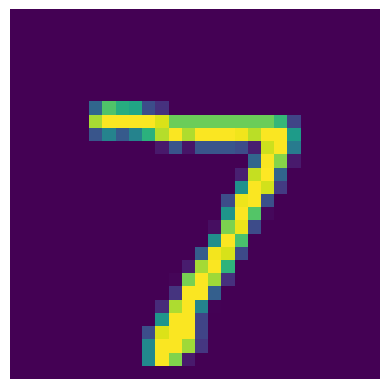

In [74]:
plt.imshow(test_photo)
plt.axis('off')